In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


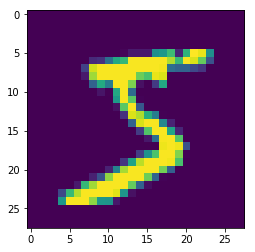

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(trainX[0])

In [3]:
print (trainX.shape)
print (trainY.shape)
print (testX.shape)
print (testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Reshape X values as a 4 Rank Tensor

    - Batch
    - Height
    - Weight
    - Channels

In [4]:
trainXR = trainX.reshape(60000,28,28,1)
testXR = testX.reshape(10000,28,28,1)

# Encode Y values 

In [5]:
from keras.utils import to_categorical

trainYE = to_categorical(trainY)
testYE = to_categorical(testY)

# CNN Model

    - Try with different values of Kernel, Strides, Filters

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D

model = Sequential()
model.add(Conv2D(filters=15, kernel_size=3, strides=(1,1), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=14, kernel_size=3, strides=(2,2), activation='relu'))
model.add(Conv2D(filters=13, kernel_size=3, strides=(2,2), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainXR, trainYE, validation_data=(testXR, testYE), epochs=1)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 15)        150       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 14)        1904      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 13)          1651      
_________________________________________________________________
flatten_1 (Flatten)          (None, 325)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3260      
Total params: 6,965
Trainable params: 6,965
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 60000 sampl

# Predict on some value & compare against actual value

Expected Number is 3
Predicted Number is 3


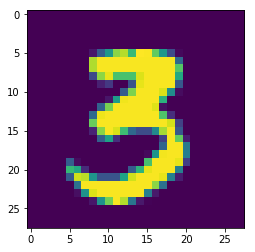

In [7]:
import random
img_number = random.randint(0,5000)

testImage = testX[img_number]
plt.imshow(testImage)

actualNumber = testY[img_number]
print ('Expected Number is %d'%(actualNumber))

predictedNumber = model.predict_classes(testImage.reshape(1,28,28,1))
print ('Predicted Number is %d'%(predictedNumber))

# Save the model

In [8]:
from pickle import dump
model.save('mnist-cnn-model.h5')

# Load the model

In [9]:
from pickle import load
from keras.models import load_model

lmodel = load_model('mnist-cnn-model.h5')

# Visualizations activations (outputs) at each layer

    - Very good article available at https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

## Step 1: Retrieve layers information from the model

In [10]:
# Fetch the layers from the model object
layers = lmodel.layers

print ('Number of layers in network is %d'%(len(layers)))
for i in range(0,len(layers)):
    print ('Layer name is %s'%(layers[i].name))
    
num_conv_layers = 2

conv_layers_ouput = [layer.output for layer in lmodel.layers[:num_conv_layers]]
print ('Number of convolution layers in network are %d'%(len(conv_layers_ouput)))

Number of layers in network is 5
Layer name is conv2d_1
Layer name is conv2d_2
Layer name is conv2d_3
Layer name is flatten_1
Layer name is dense_1
Number of convolution layers in network are 2


## Step 2: Create model object to capture activations/outputs from layers

In [11]:
from keras.models import Model

# Here we are defining a new type of model object; Model. This model takes the actual model as input, expected cnn layers as 
# output and loads the outputs.
activation_model = Model(inputs=lmodel.input, outputs=conv_layers_ouput)

activations = activation_model.predict(testImage.reshape(1,28,28,1))

## Step 3: Visualize activations

Layer number 0 has shape (1, 26, 26, 15), number of dimensions is 4 and channels in each layer are 15
Layer number 1 has shape (1, 12, 12, 14), number of dimensions is 4 and channels in each layer are 14


C:\MachineLearning\anaconda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


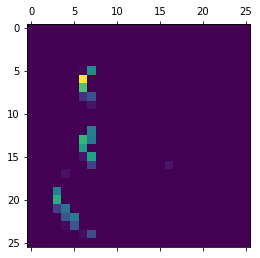

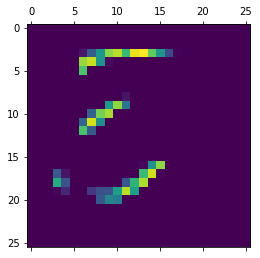

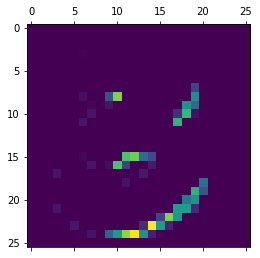

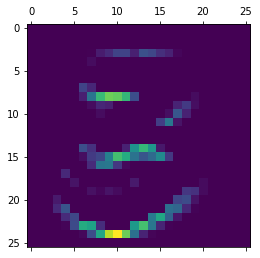

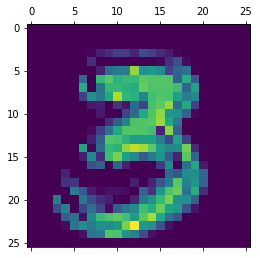

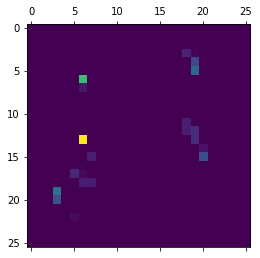

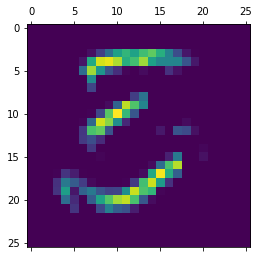

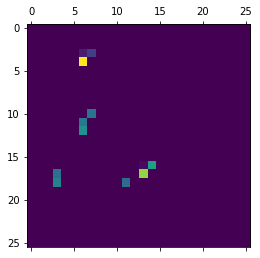

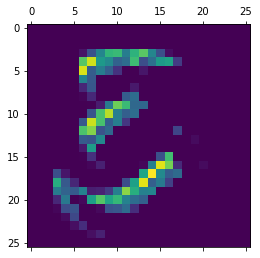

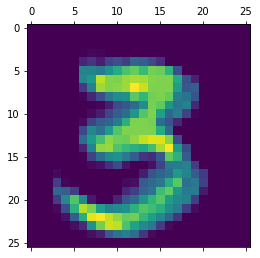

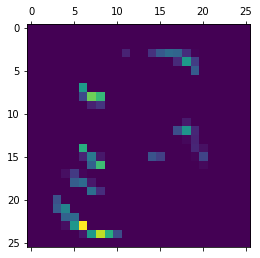

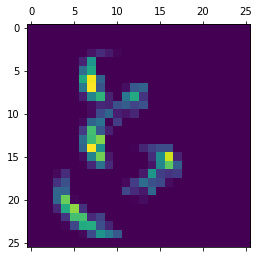

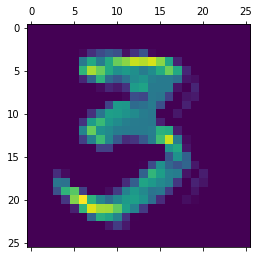

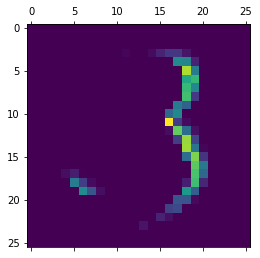

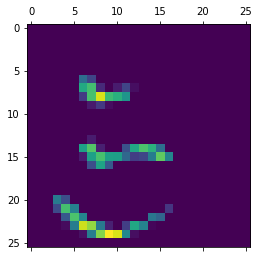

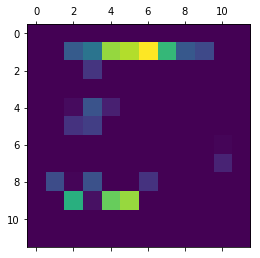

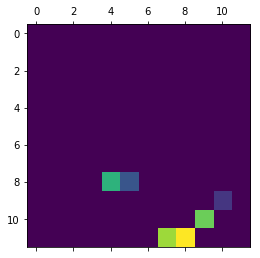

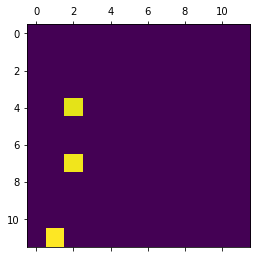

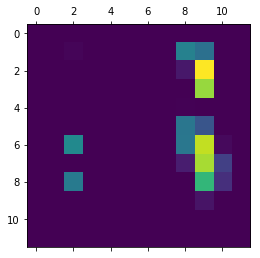

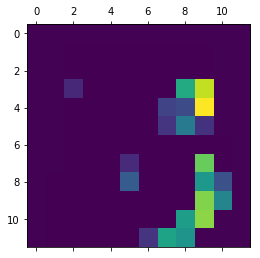

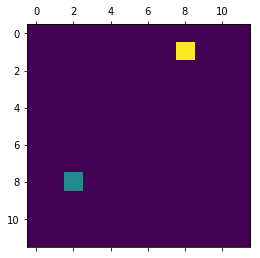

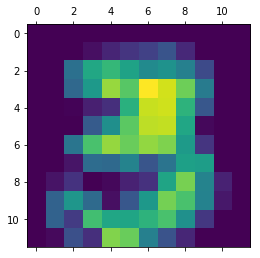

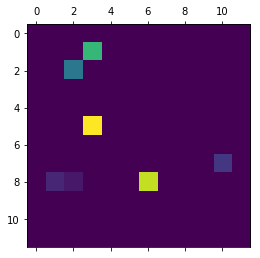

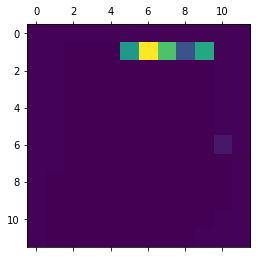

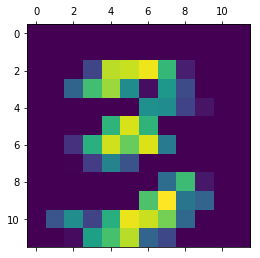

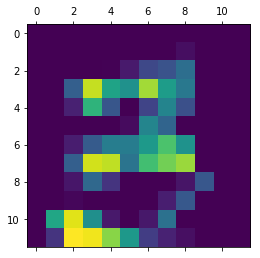

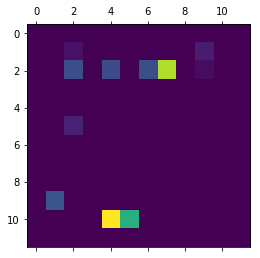

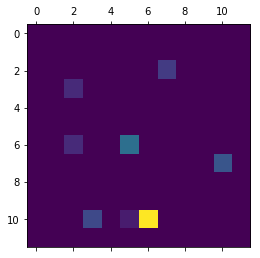

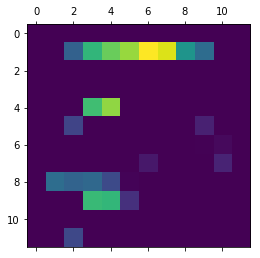

In [12]:
num_activations = len(activations)
for layer_num in range(0, num_activations):
    
    cnn_layer = activations[layer_num]
    num_channels = cnn_layer.shape[-1]
    num_dimensions = cnn_layer.ndim
    
    print ('Layer number %d has shape %s, number of dimensions is %d and channels in each layer are %d'%(layer_num, cnn_layer.shape, num_dimensions, num_channels))
    
    if num_dimensions == 3:
        for channel in range (0, num_channels):
            plt.matshow(cnn_layer[:,:,channel], cmap='viridis')
    else :
        for channel in range (0, num_channels):
            plt.matshow(cnn_layer[0,:,:,channel], cmap='viridis')